# Performing PCA over the RNA-Seq data set and make a scatter plot of PC1 and PC2

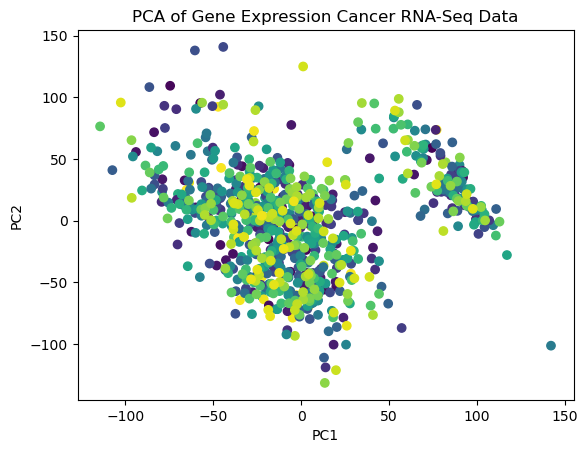

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv(r'Downloads\data.csv')
temp = df.iloc[:, 1:].values
temp1= df.iloc[:, 0].values
en= LabelEncoder()
num = en.fit_transform(temp1)
scaler = StandardScaler()
scaled = scaler.fit_transform(temp)
pca = PCA(n_components=2)
pc12 = pca.fit_transform(scaled)
plt.scatter(pc12[:, 0], pc12[:, 1], c=num)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Gene Expression Cancer RNA-Seq Data')
plt.show()

In [7]:
var = pca.explained_variance_ratio_
print("Variance :", var)

Variance : [0.10539781 0.08754232]


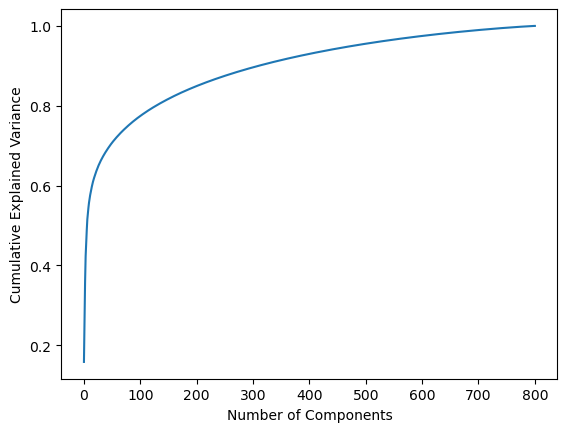

curve method: 4
 variance method: 80
threshold method: 800


In [8]:
pca = PCA().fit(temp)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
cum = np.cumsum(pca.explained_variance_ratio_)
elbow = np.where(np.diff(cum) < 0.05)[0][0] + 1
print("curve method:", elbow)
cum = np.cumsum(pca.explained_variance_ratio_)
vari = np.where(cum > 0.75)[0][0] + 1
print(" variance method:", vari)
thresh= np.sum(pca.explained_variance_ >= 1)
print("threshold method:", thresh)

In [9]:
cum = np.cumsum(pca.explained_variance_ratio_)
vari = np.where(cum > 0.75)[0][0] + 1
print("Number of components to keep based on cumulative variance method:", vari)
thresh= np.sum(pca.explained_variance_ >= 1)
print("Number of components to keep based on variance threshold method:", thresh)



Number of components to keep based on cumulative variance method: 80
Number of components to keep based on variance threshold method: 800


# Observing the loadings in PCA 

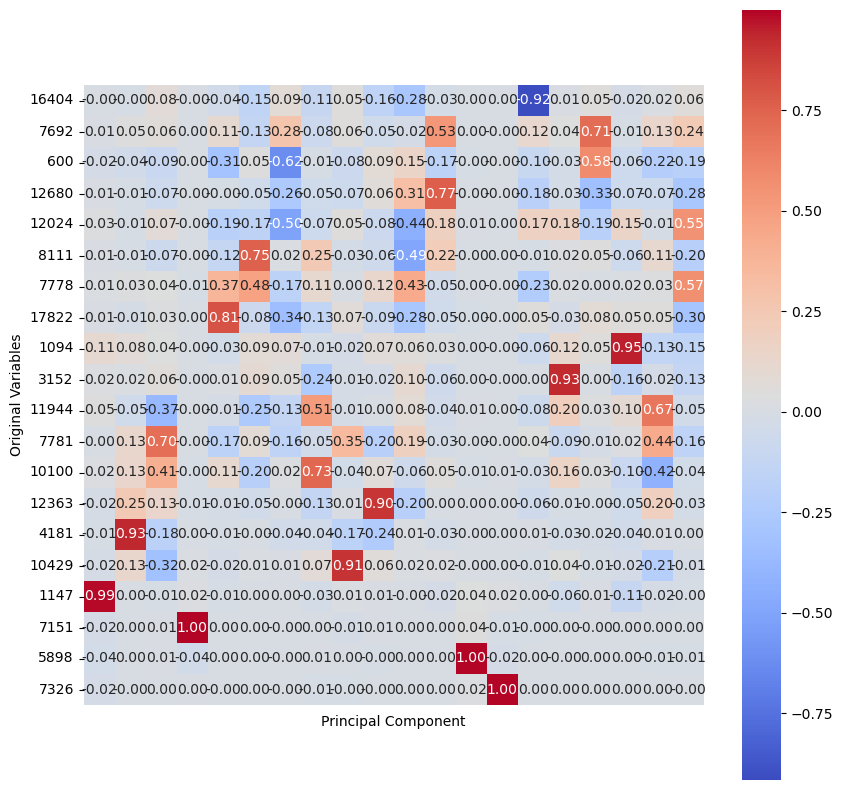

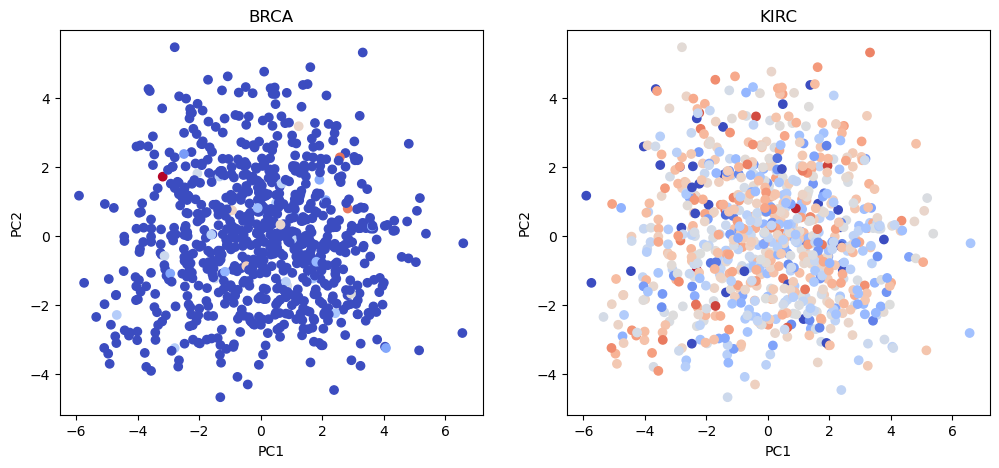

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df = pd.read_csv(r'Downloads\data.csv')
temp = df.drop(df.columns[0], axis=1).values
gene= df.columns[1:].tolist()
pca = PCA().fit(temp)
corr = pd.DataFrame(temp).corrwith(pd.Series(pca.components_[0]))
corr = corr.abs().sort_values(ascending=False).iloc[:20].index
feat = temp[:, corr]
pca = PCA().fit(feat)
plt.figure(figsize=(10,10))
sns.heatmap(pca.components_, cmap='coolwarm', square=True, annot=True, fmt='.2f', xticklabels=False, yticklabels=corr)
plt.xlabel('Principal Component')
plt.ylabel('Original Variables')
plt.show()
col= ['PC{}'.format(i+1) for i in range(len(pca.components_))]
df = pd.DataFrame(pca.transform(feat), columns=col)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
for i, var in enumerate(['BRCA', 'KIRC']):
    axs[i].scatter(df['PC1'], df['PC2'], c=temp[:, i], cmap='coolwarm')
    axs[i].set_xlabel('PC1')
    axs[i].set_ylabel('PC2')
    axs[i].set_title(var)
plt.show()


# Dimensionality reduction over the RNA-Seq data set with PCA.
## Keeping 90% of variance after PCA and reduce the RNA-Seq data set 

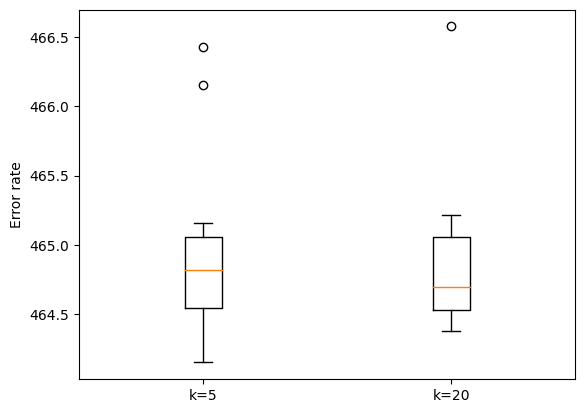

In [30]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
data= pd.read_csv(r'Downloads\data.csv')
labels = data.iloc[:, -1]
data = data.iloc[:, :-1]

corr = np.abs(data.corrwith(labels))
corr = corr.sort_values(ascending=False)
feat = corr[:20].index.tolist()
dataf = data[feat]
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
delta_R = pca.fit_transform(dataf)
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters=5)
kmeans20 = KMeans(n_clusters=5)
error5 = []
error20 = []
for i in range(20):
    kmeans5.fit(delta_R)
    error5.append(kmeans5.inertia_)
    
    kmeans20.fit(delta_R)
    error20.append(kmeans20.inertia_)
import matplotlib.pyplot as plt
plt.boxplot([error5, error20])
plt.xticks([1, 2], ['k=5', 'k=20'])
plt.ylabel('Error rate')
plt.show()



# hierarchical clustering with complete linkage cluster 

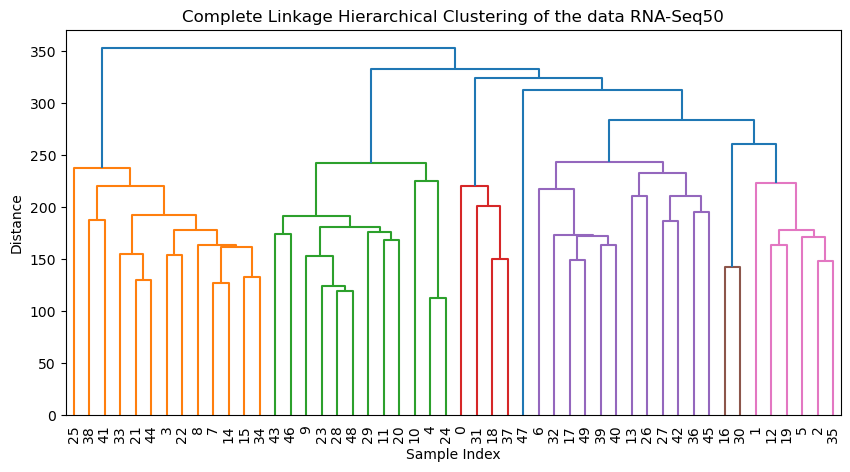

In [25]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
df = pd.read_csv(r'Downloads\data.csv')
np.random.seed(123)
random = df.sample(n=50)
temp = random.iloc[:, 1:].values
link = linkage(temp, method= 'complete')
plt.figure(figsize=(10, 5))
dendrogram(link, leaf_rotation=90, leaf_font_size=10)
plt.title('Complete Linkage Hierarchical Clustering of the data RNA-Seq50')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

